In [14]:
# Load the class first. This only needs to be run once
from IPython.display import Image

## -p参数：旋转

In [2]:
%%bash
fig_name=test_basemap_p
fig_fmt=png
gmt begin $fig_name $fig_fmt
gmt gmtset MAP_FRAME_TYPE=fancy+
fig_width=14
lon_min=-75
lon_max=-60
lat_min=-50
lat_max=-40
# 方位角
azimuth=135
# 仰角
elevation=90
range_lon_lat=$lon_min/$lon_max/$lat_min/$lat_max
gmt basemap -JM${fig_width}c -R$range_lon_lat -Ba5f1 -BWSen+t"(a) without -p" -TdjBL+o0c/0c+w1.5c+f+l,E,,N
gmt basemap -B -BWSen+t"(b) -p"$azimuth"/"$elevation -TdjBL+o0c/0c+w1.5c+f+l,E,,N -X16c -p${azimuth}/${elevation}
# 更改仰角
elevation=45
gmt basemap -B -BWSen+t"(c) -p"$azimuth"/"$elevation -TdjBL+o0c/0c+w1.5c+f+l,E,,N -X19c -p${azimuth}/${elevation}
gmt end

调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: 0.707107 b: -0.707107 c: 0.707107 d: 0.707107 e: -0.000000  f: 4676.926742
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: 0.707107 b: -0.500000 c: 0.707107 d: 0.500000 e: -0.000000  f: 3307.086614
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗


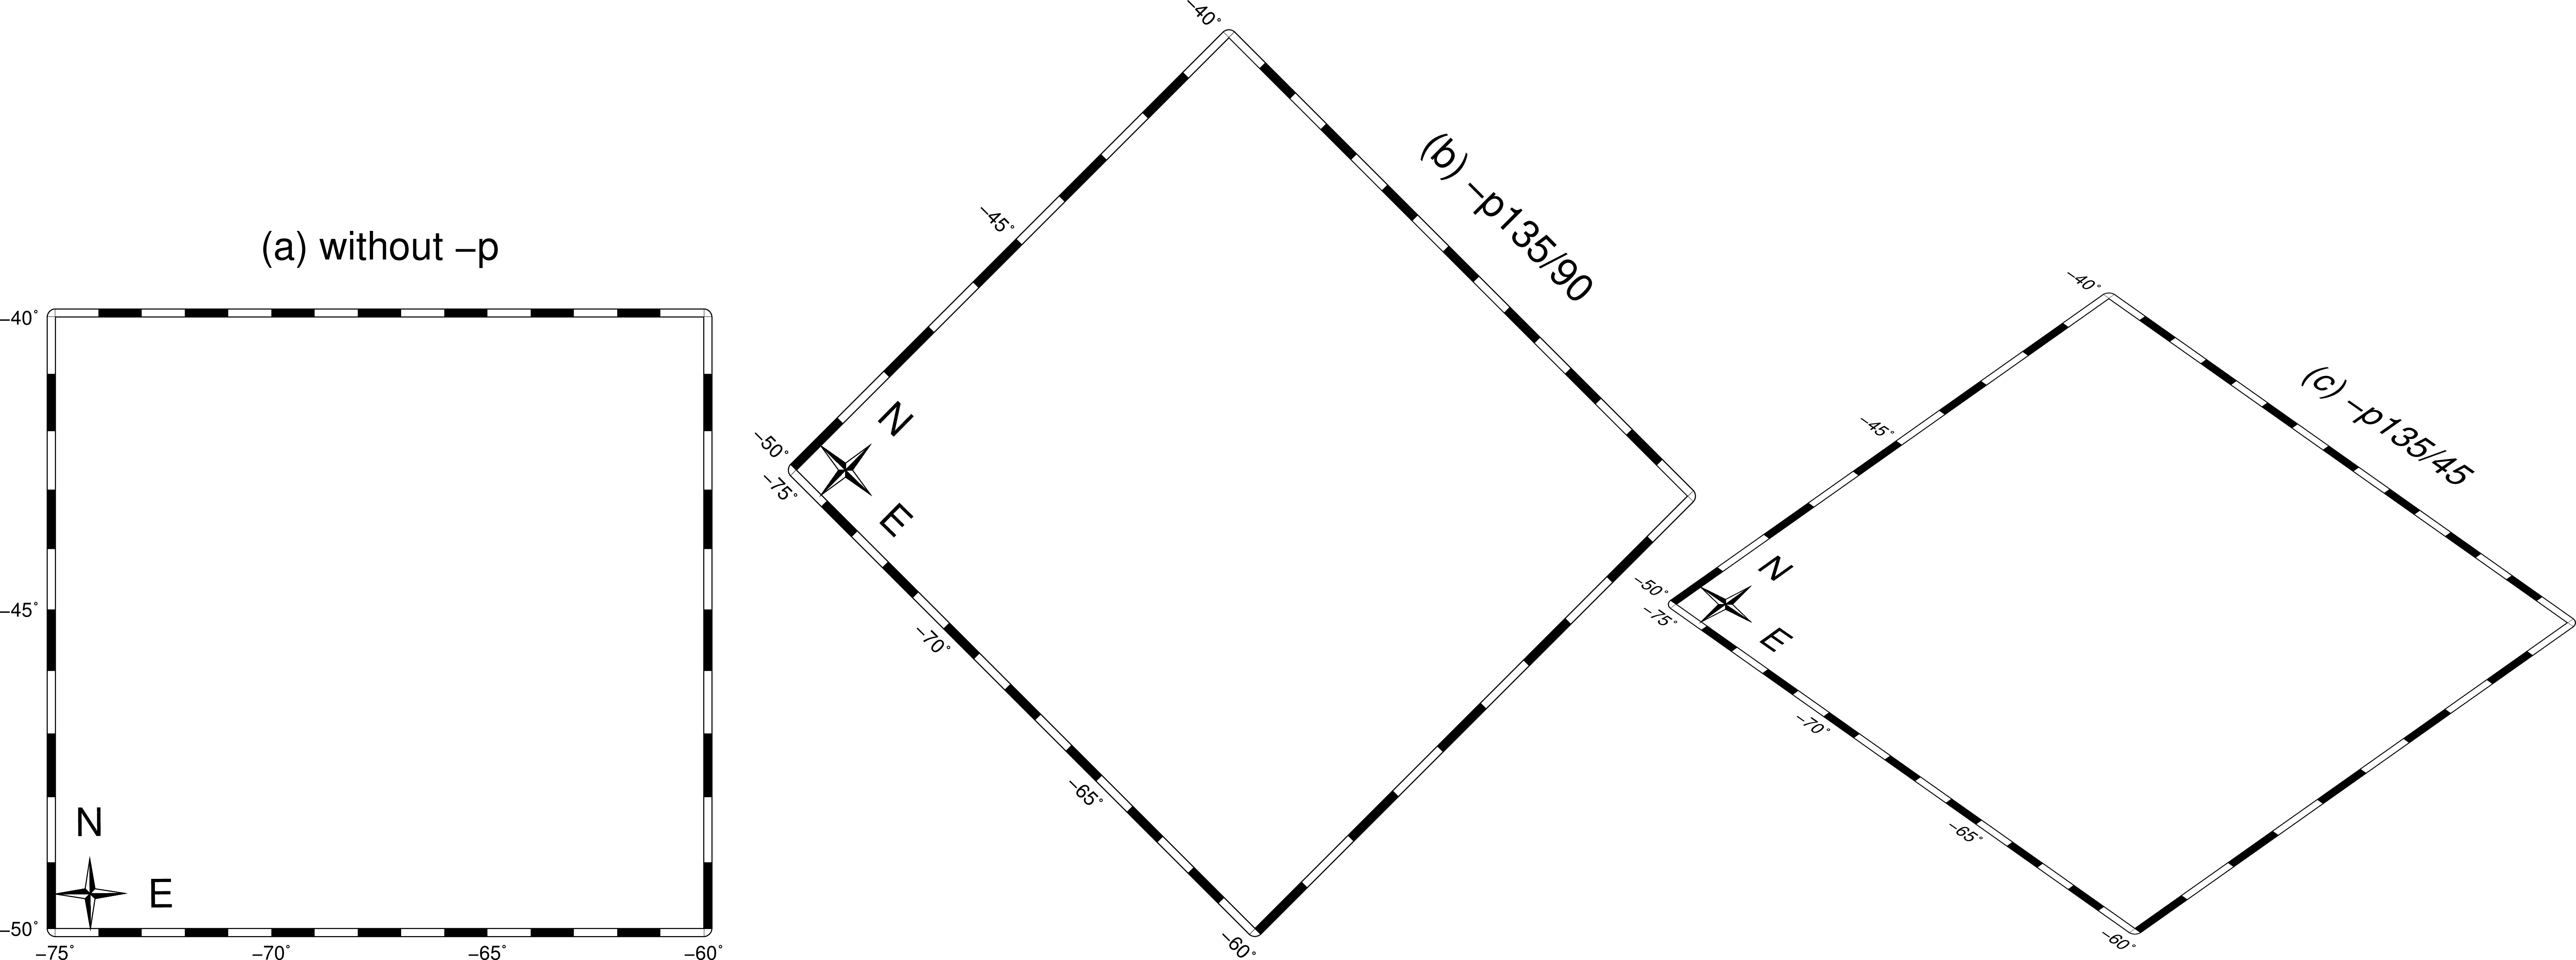

In [5]:
Image('test_basemap_p.png', width=800)

## -JZ参数：纵轴（第三维）

In [6]:
%%bash
fig_name=test_basemap_JZ
fig_fmt=png
gmt begin $fig_name $fig_fmt
    gmt gmtset MAP_FRAME_TYPE=fancy+
    fig_width=14
    # 增加图像高度：及纵轴方向的长度
    fig_height=8
    lon_min=-75
    lon_max=-60
    lat_min=-50
    lat_max=-40
    # 增加纵轴方向的范围
    z_min=0
    z_max=999
    # 方位角
    azimuth=135
    # 仰角
    elevation=45
    range_lon_lat=$lon_min/$lon_max/$lat_min/$lat_max
    range_z=$z_min/$z_max
    range=$range_lon_lat/$range_z
    gmt basemap -R$range -JM$fig_width -JZ$fig_height -Ba5f1 -Bza250f50g250+l"km" -BWSenZ+b+t"3D basemap: "$azimuth"/"$elevation -TdjBL+o0c/0c+w1.5c+f+l,E,,N -pz${azimuth}/${elevation}
    azimuth=45
    gmt basemap -JZ -B -Bza250f50g250+l"km" -BWSenZ+b+t"3D basemap: "$azimuth"/"$elevation -TdjBL+o0c/0c+w1.5c+f+l,E,,N -pz${azimuth}/${elevation} -X19c
    elevation=30
    gmt basemap -JZ -B -Bza250f50g250+l"km" -BWSenZ+b+t"3D basemap: "$azimuth"/"$elevation -TdjBL+o0c/0c+w1.5c+f+l,E,,N -pz${azimuth}/${elevation} -X19c
gmt end

调试gmt_plot-郭志馗
XY平面  a: 0.707107 b: -0.500000 c: 0.707107 d: 0.500000 e: -0.000000  f: 3307.086614
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
YZ平面 a: 0.707107 b: 0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
XZ平面 a: 0.707107 b: -0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
YZ平面 a: 0.707107 b: 0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
XZ平面 a: 0.707107 b: -0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: 0.707107 b: -0.500000 c: 0.707107 d: 0.500000 e: -0.000000  f: 3307.086614
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: -0.707107 b: -0.500000 c: 0.707107 d: -0.500000 e: 4676.926742  f: 6426.538745
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
XZ平面 a: -0.707107 b: -0.5

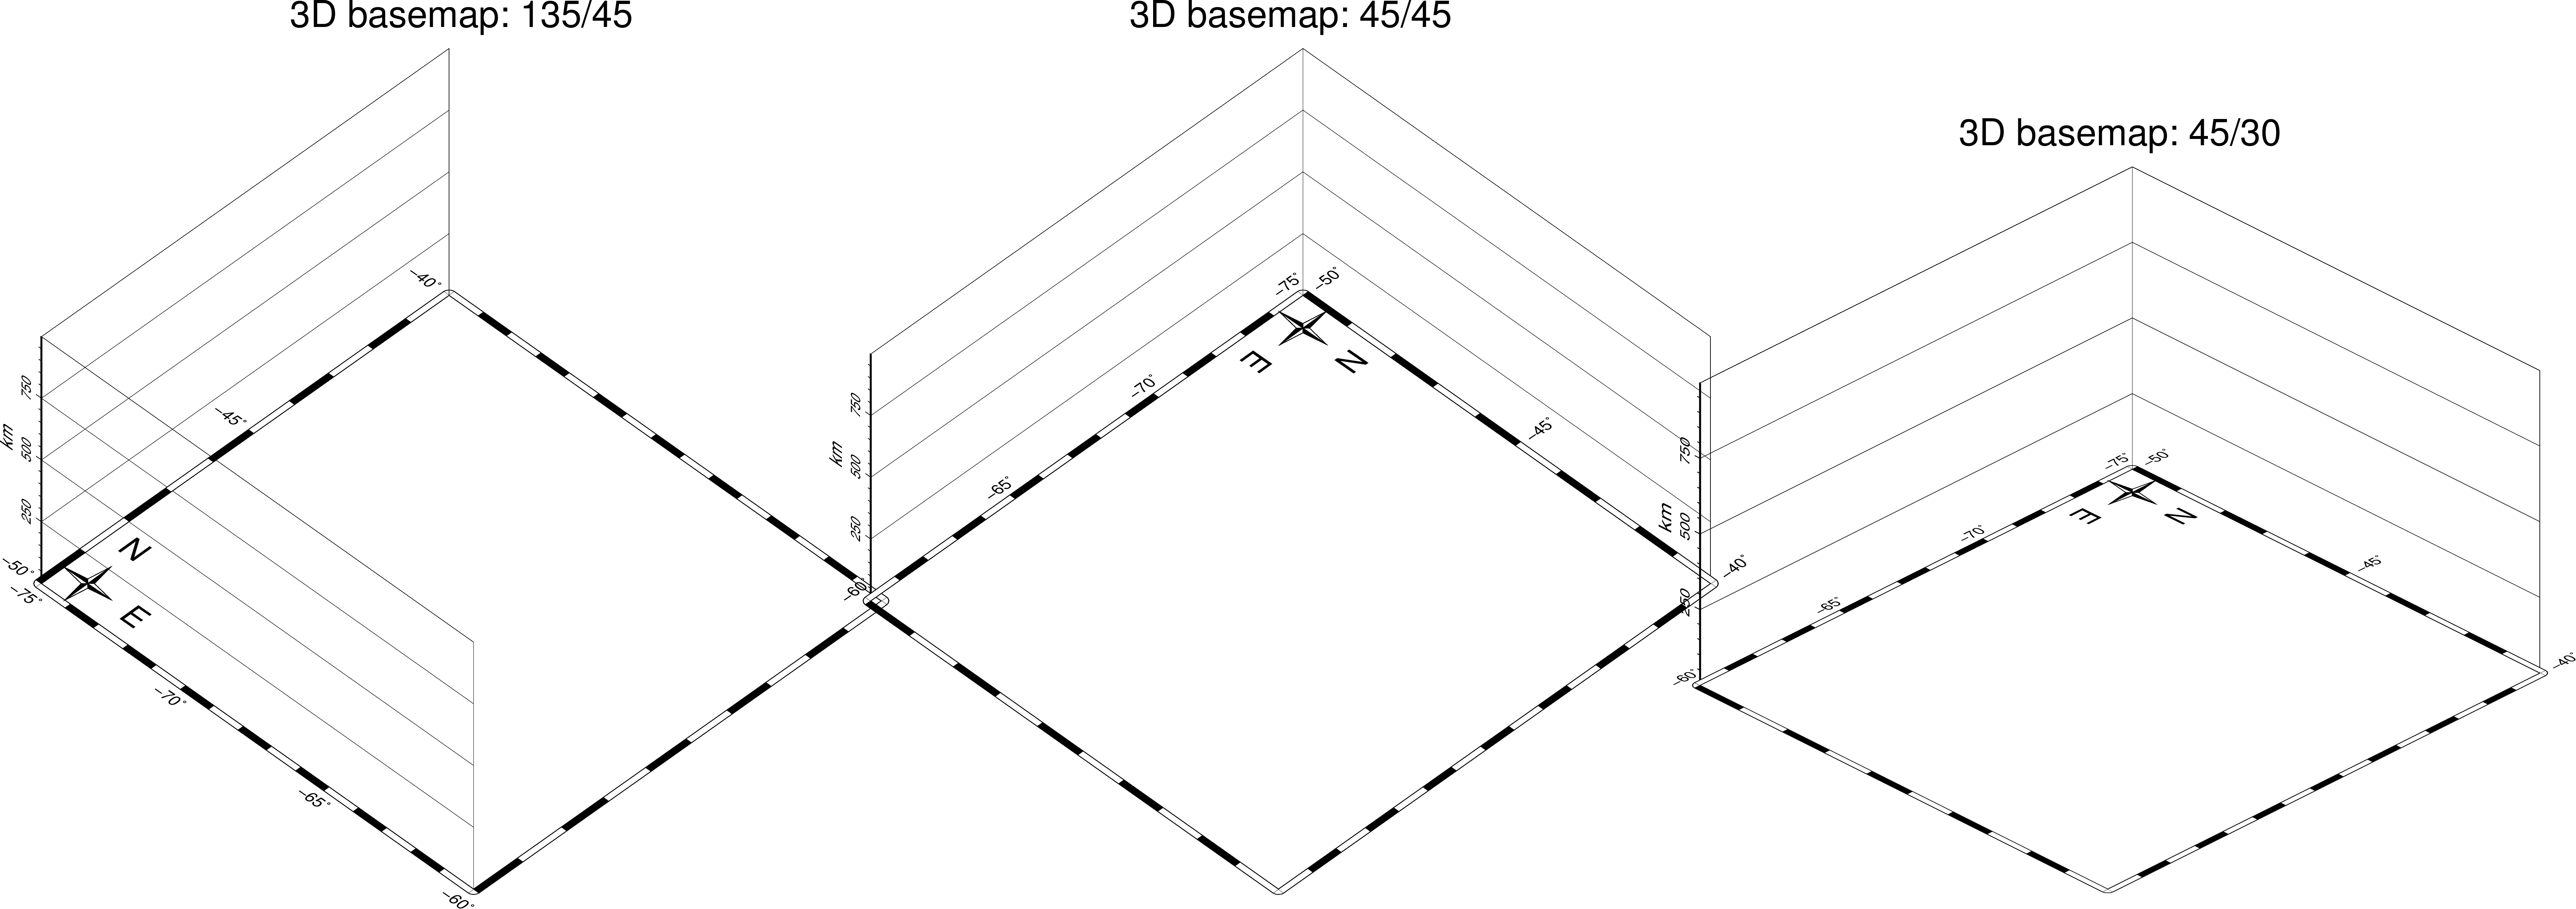

In [7]:
Image('test_basemap_JZ.png', width=800)

## 三维切片

In [9]:
%%bash
#!/bin/bash
gmt set GMT_COMPATIBILITY=5 MAP_FRAME_TYPE=plain
# 1. 数据和绘图坐标参数设置
fig_width_x=14
fig_width_z=8
# 数据范围
lon_min=-75
lon_max=-60
lat_min=-50
lat_max=-40
zmin=0
zmax=999
# 数据中心点坐标
lon0=`echo $lon_min $lon_max | awk '{print $1+($2-$1)/2.0}'`
lat0=`echo $lat_min $lat_max | awk '{print $1+($2-$1)/2.0}'`
echo $lon0 $lat0
range_lon_lat=$lon_min/$lon_max/$lat_min/$lat_max
range_z=$zmin/$zmax
range=$range_lon_lat/$range_z
# 投影参数
proj_xy=M$lon0/$lat0/$fig_width_x  #x-y平面的投影参数
# 数据文件名
data_xy=base.nc
data_xy_cart=base_cart.nc
data_yz=slice_cut.nc

# 2. x-y平面内的网格数据
# gmt grdmath -R$range_lon_lat -I0.005 X D2R Y D2R ADD STO@xySum SIN @xySum 3 MUL NEG EXP MUL = $data_xy

# 3. 沿纬度方向的垂直切片
lat_min_slice=-47.5
lat_max_slice=-42.5
# gmt grdmath -R${lat_min_slice}/${lat_max_slice}/${zmin}/${zmax} -I0.005/0.5 X D2R -67.5 D2R ADD STO@xySum SIN @xySum 3 Y 1E4 DIV SUB MUL NEG EXP MUL = slice.nc

# 4. 将数据范围投影到图像空间的大小:x对应经度方向；y对应纬度方向
xmin=`echo $lon_min $lat_min | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $1}'`
ymin=`echo $lon_min $lat_min | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $2}'`
xmax=`echo $lon_max $lat_max | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $1}'`
ymax=`echo $lon_max $lat_max | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $2}'`
ymin_slice=`echo $lon0 $lat_min_slice | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $2}'`
ymax_slice=`echo $lon0 $lat_max_slice | gmt mapproject -R$range_lon_lat -J$proj_xy | awk '{print $2}'`
echo $xmin $xmax $ymin $ymax $ymin_slice $ymax_slice
fig_width_y=$ymax

# 5. 将切片数据投影到图像大小的空间：最好利用中心经度，也就是后面的-JM参数中的中心经度值
# mapproject输入经纬度值（读取前两列），投影参数与后面作图的时候一致，输出的前两列是x,y值，位于[0,fig_width_x]和[0,fig_width_y]范围内,fig_width_y目前还不知道，需要计算
# gmt grd2xyz slice.nc | awk '{print "'$lon0'",$0}' | gmt mapproject -R$range_lon_lat -J$proj_xy |awk '{print $2,$3,$4}'> points.txt
# gmt grdproject $data_xy -R$range_lon_lat -J$proj_xy -r -E300 -G$data_xy_cart

# 6. 重新网格化切片
# gmt surface points.txt -G$data_yz -R$ymin_slice/$ymax_slice/$zmin/$zmax -I1500+/2000+ -C0.1 -T0.25

# # 开始绘图
proj_yz=X$fig_width_y/$fig_width_z
proj_xz=X$fig_width_x/$fig_width_z
rm gmt.history gmt.conf
# 8.1 将数据显示在平面内
fig_name=vslice_gmt
fig_fmt=png
gmt begin $fig_name $fig_fmt
    # x-y平面的数据显示
    gmt basemap -J$proj_xy -R$range_lon_lat -Ba5f1 -BWSen+t"Data on x-y plane"
    gmt grdimage $data_xy -Ccpt-city/oc/sst
    gmt coast -Df -A0/0/1 -N1/0.5p,black,-..- -W0.5p,black
    # y-z切片数据显示
    move_x=16
    gmt basemap -J$proj_yz -R$ymin/$ymax/$zmin/$zmax -Bxa5f1+l"y (latitude)" -Bya200f40+l"z (km)" -BWSen+t"Slice data on y-z plane" -X$move_x -p90/90
    gmt grdimage $data_yz -Crainbow -p
    # x-z切片数据显示
    gmt basemap -J$proj_yz -R$xmin/$xmax/$zmin/$zmax -Bxa5f1+l"x (longitude)" -Bya200f40+l"z (km)" -BWSen+t"Slice data on x-z plane" -X-$move_x -Y-10
    gmt grdimage $data_yz -Chot
gmt end


# 8.2 显示为3维切片形式
# 方位角设置
azimuth=135
elevation=45
angle_view=$azimuth/$elevation
fig_name=vslice_gmt_3D
fig_fmt=png
gmt begin $fig_name $fig_fmt
    echo "figwidth "$fig_width_x $fig_width_y $fig_width_z
    echo "range " $xmin $xmax $ymin $ymax $zmin $zmax
    # 三维框架
    gmt basemap -J$proj_xy -JZ$fig_width_z -R$range -pz$angle_view -Ba5f1 -Bza200f40g200+l"Z (km)" -BwSEnZ+b
    # 贴x-y平面数据图
    gmt grdimage $data_xy -J$proj_xy -JZ$fig_width_z -R$range -pz$angle_view/0 -Ccpt-city/oc/sst --MAP_FRAME_AXES=''
    gmt coast -J$proj_xy -JZ$fig_width_z -R$range -pz$angle_view/0 -Df -A0/0/1 -N1/0.5p,black,-..- -W0.5p,black
    # # 贴y-z平面的切片数据
    gmt grdimage $data_yz -JX$fig_width_y/$fig_width_z -JZ$fig_width_x -R$ymin/$ymax/$zmin/$zmax/$xmin/$xmax  -px$angle_view/7 -Crainbow
    gmt grdimage $data_yz -JX$fig_width_x/$fig_width_z -JZ$fig_width_y -R$xmin/$xmax/$zmin/$zmax/$ymin/$ymax -py$angle_view/0 -Chot
gmt end


-67.5 -45
0 14 0 13.2056806874 3.52953511063 10.1133348136
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: -0.000000 b: -1.000000 c: 1.000000 d: -0.000000 e: 0.000000  f: 6238.904262
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
XY平面  a: -0.000000 b: -1.000000 c: 1.000000 d: -0.000000 e: 0.000000  f: 6238.904262
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
调试gmt_plot-郭志馗
figwidth 14 13.2056806874 8
range  0 14 0 13.2056806874 0 999
调试gmt_plot-郭志馗
XY平面  a: 0.707107 b: -0.500000 c: 0.707107 d: 0.500000 e: -0.000000  f: 3307.086614
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
YZ平面 a: 0.707107 b: 0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
XZ平面 a: 0.707107 b: -0.500000 c: 0.000000 d: 0.707107 e: -0.000000  f: 3307.087200
ix: 1200.000000 iy: 1200.000000
调试gmt_plot-郭志馗
YZ平面 a: 0.707107 b: 0.500000 c

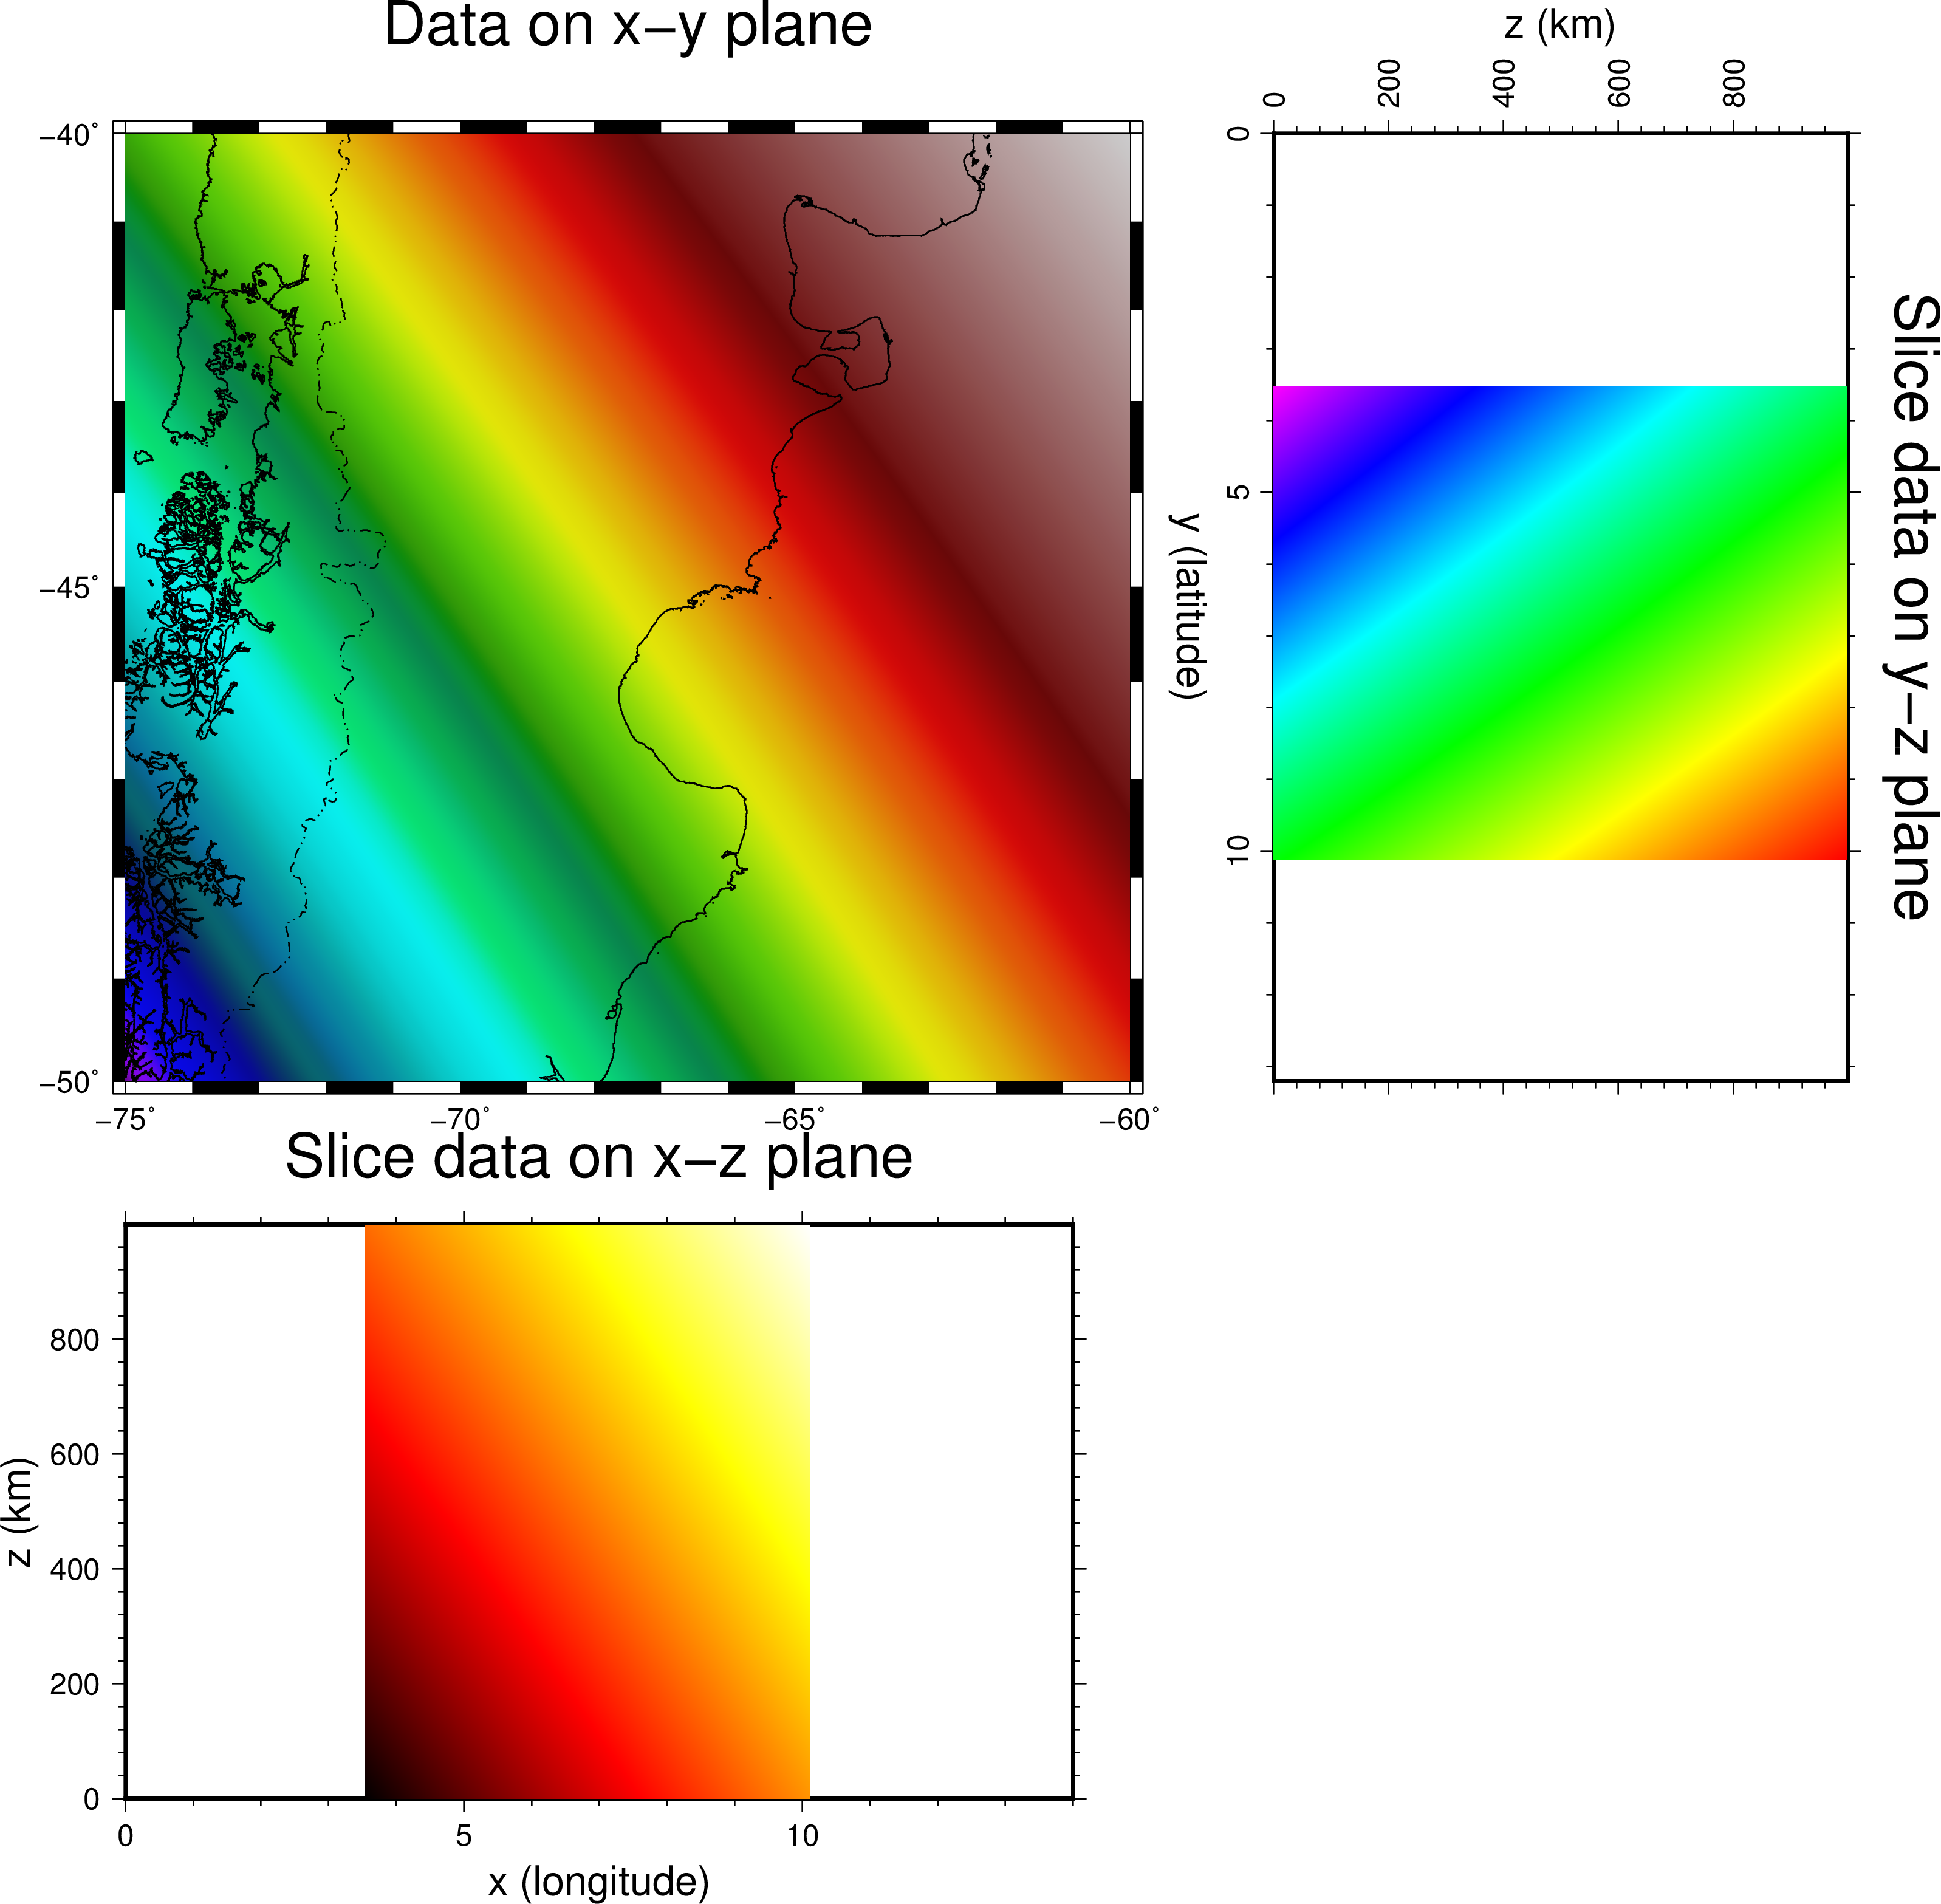

In [15]:
Image('vslice_gmt.png', width=800)

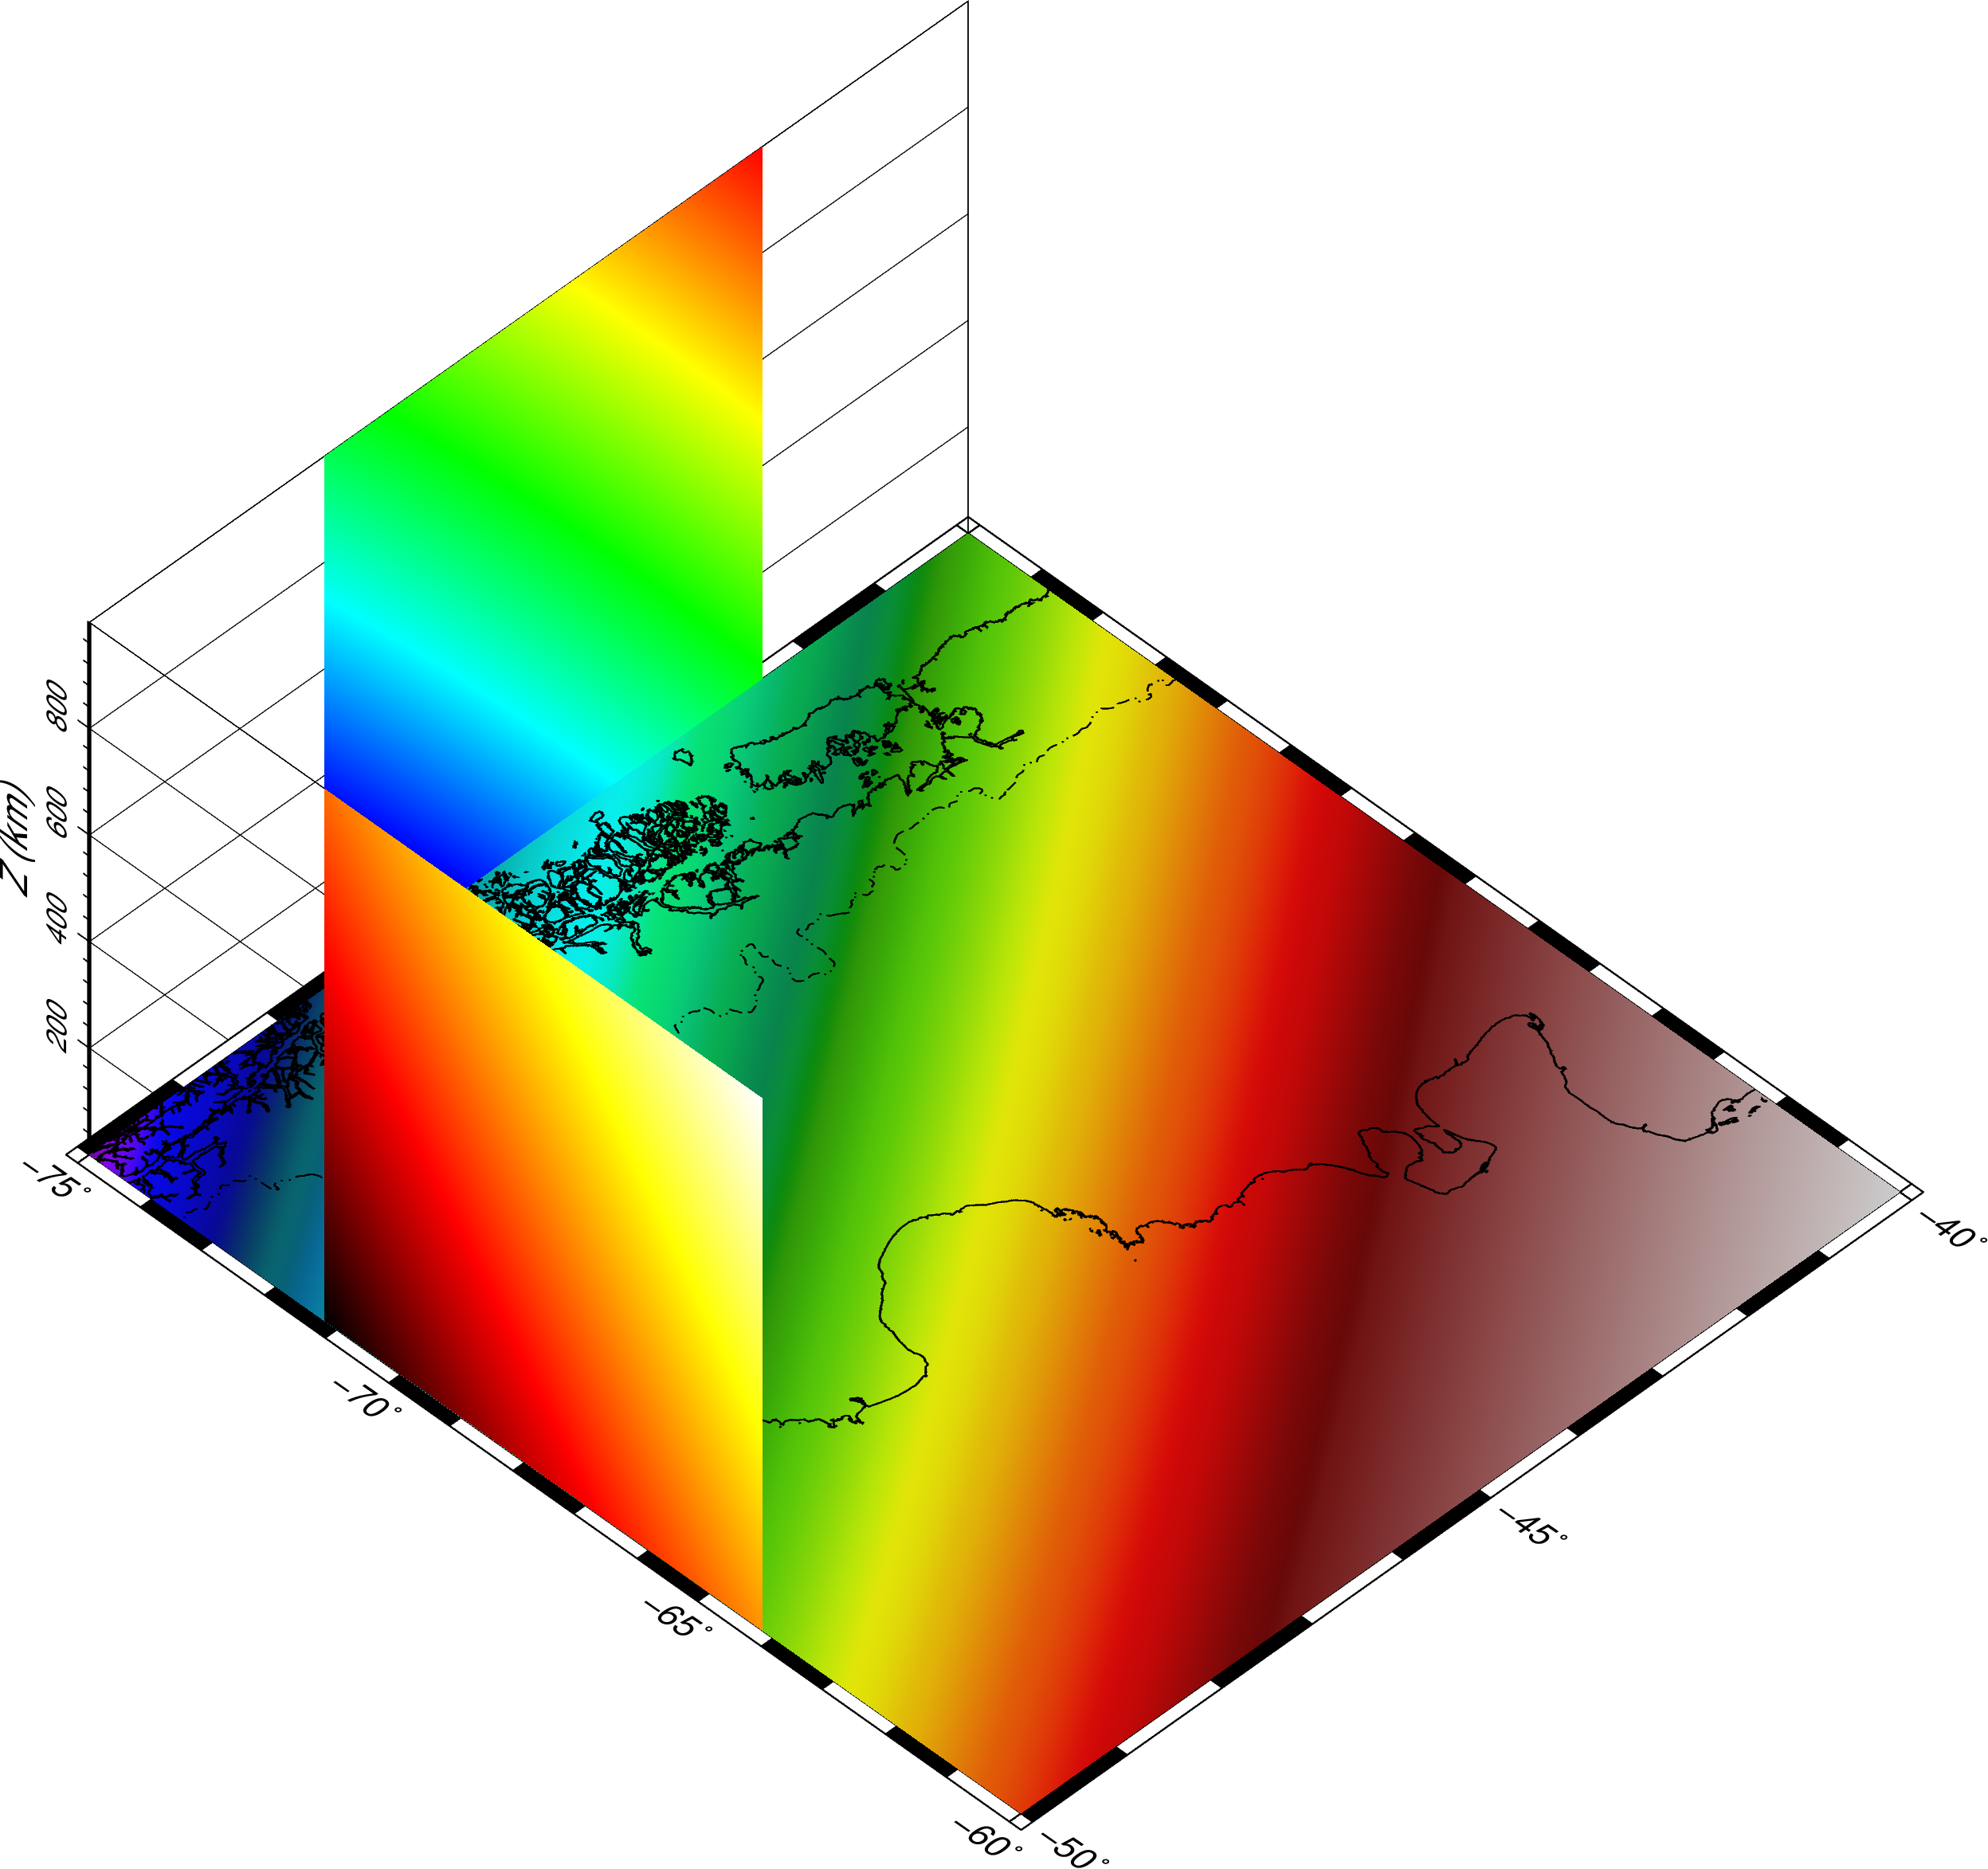

In [16]:
Image('vslice_gmt_3D.png', width=800)